### Author : Mody Medhat
### GRIP @ The Sparks Foundation

# Project Description

>## Predict the percentage of an student based on the no. of study hours.

### `Import the main Libraries`

In [1]:
## Major Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Other
import missingno

ModuleNotFoundError: No module named 'pandas'

### `Load the Dataset`

In [60]:
DataUrl = 'http://bit.ly/w-data'
df = pd.read_csv(DataUrl)
df.head().T

,0,1,2,3,4
Hours,2.5,5.1,3.2,8.5,3.5
Scores,21.0,47.0,27.0,75.0,30.0


### `Exploratory Data Analysis`

In [61]:
## Check info about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [62]:
## Show some statistics about the Dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


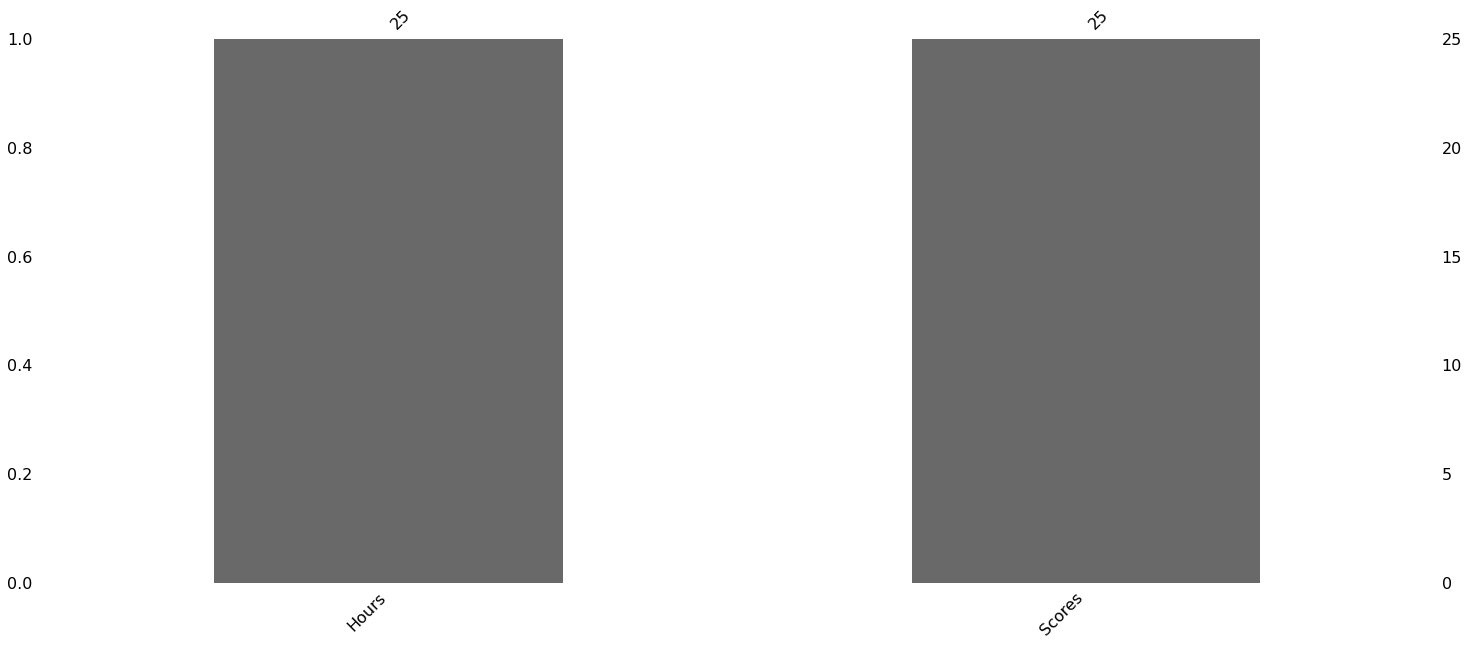

In [63]:
## check nulls using missingno
missingno.bar(df);

* > `Dataset is a contains 25 instances and there is no nulls values` 

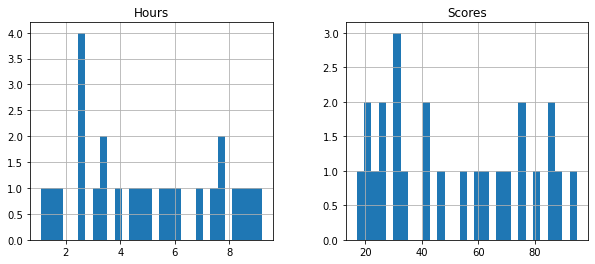

In [64]:
## Histogram Distr. of Numerical Features in Dataset
df.hist(bins=30, figsize=(10, 4))
plt.show()

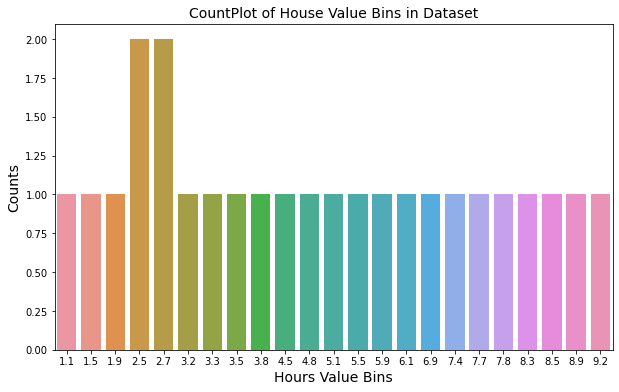

In [65]:
## Countplot for the Hours Values
plt.figure(figsize=(10, 6))
sns.countplot(x=df.Hours)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('Hours Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

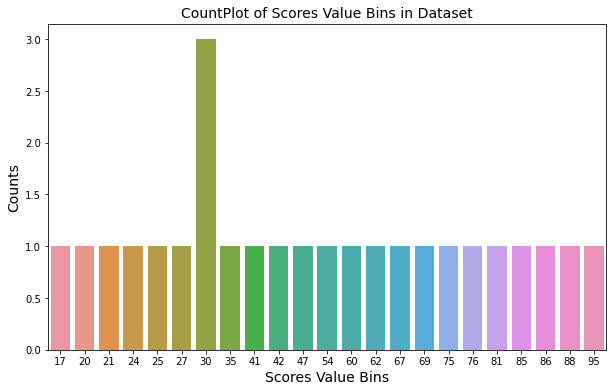

In [66]:
## Countplot for the Scores Values
plt.figure(figsize=(10, 6))
sns.countplot(x=df.Scores)
plt.title('CountPlot of Scores Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('Scores Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

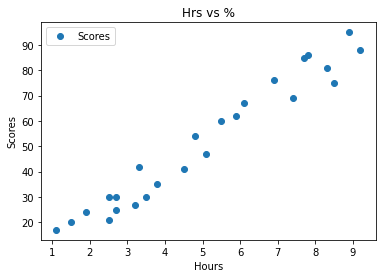

In [67]:
df.plot(x='Hours', y='Scores', style='o')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hrs vs %")
plt.show()

### `Check the Correlation between the Features and Target`

In [68]:
## Using pearson correlation
df.corr()['Scores'].sort_values(ascending=False)

Scores    1.000000
Hours     0.976191
Name: Scores, dtype: float64

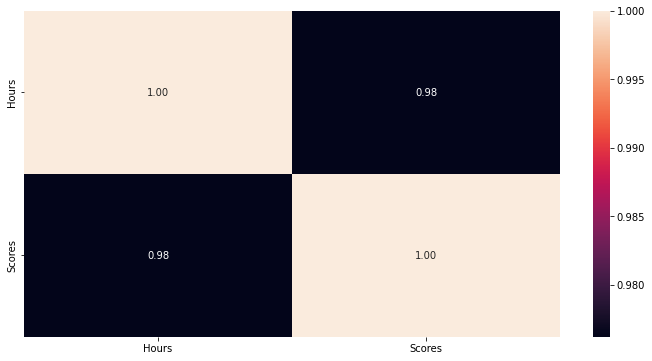

In [69]:
## heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f')  ## symmetric matrix
plt.show()

### `Split the Dataset`

In [70]:
## Split the whole Dataset to Feature & Target
X = df['Hours'].values   ## Features
X = X.reshape(-1, 1)
y = df['Scores'].values   ## target
y = y.reshape(-1, 1)

In [71]:
## Random split the dataset to two sets (train_set, test_set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

In [72]:
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (21, 1)
y_train shape --  (21, 1)
X_test shape --  (4, 1)
y_test shape --  (4, 1)


### `Model Training`

In [83]:
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

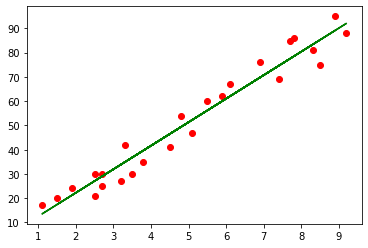

In [84]:
## Best Fit Line
line = reg.coef_*X+reg.intercept_
plt.scatter(X, y, color='red')
plt.plot(X, line, color='green')
plt.show()

### `Model Evaluating`

In [88]:
print("mean absolute error: ", metrics.mean_absolute_error(y_test, predictions))
print("mean squared error: ", metrics.mean_squared_error(y_test, predictions))
print("R-2 : ", metrics.r2_score(y_test, predictions))

mean absolute error:  4.393821175688238
mean squared error:  22.4950956257414
R-2 :  0.9685603135908576
